In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
#import talib
import random
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

In [2]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012.01.01', end = '2021.01.01')
data = df.filter(['Close'])
dataset = data.values
print("data : {}".format(dataset))
print("data : {}".format(data))


# Dimensions of Dataset
n = data.shape[0]
# y axis
p = data.shape[1]
# x axis
print("n : {}".format(n))
print("p : {}".format(p))


training_start = 0
training_end = int(np.floor(0.8*n))
test_start = training_end
test_end = n

# Numpy arange for training data
data_train = dataset[np.arange(training_start, training_end), :]
X = data_train.shape[0]
y = data_train.shape[1]

# Numpy arange for testing data
data_test = dataset[np.arange(test_start, test_end), :]
print("data_test : {}".format(data_test))
print("data_train : {}".format(data_train))
print("training end, test start : {}".format(training_end))
print("test end : {}".format(test_end))

data : [[ 14.6867857 ]
 [ 14.76571369]
 [ 14.92964268]
 ...
 [134.86999512]
 [133.72000122]
 [132.69000244]]
data :                  Close
Date                  
2012-01-03   14.686786
2012-01-04   14.765714
2012-01-05   14.929643
2012-01-06   15.085714
2012-01-09   15.061786
...                ...
2020-12-24  131.970001
2020-12-28  136.690002
2020-12-29  134.869995
2020-12-30  133.720001
2020-12-31  132.690002

[2265 rows x 1 columns]
n : 2265
p : 1
data_test : [[ 46.63249969]
 [ 47.04000092]
 [ 48.77249908]
 [ 47.76250076]
 [ 47.18500137]
 [ 46.69749832]
 [ 47.11750031]
 [ 47.18000031]
 [ 47.48749924]
 [ 47.81000137]
 [ 48.50500107]
 [ 48.83750153]
 [ 48.92250061]
 [ 49.25      ]
 [ 50.02500153]
 [ 49.875     ]
 [ 50.15499878]
 [ 49.73749924]
 [ 49.71749878]
 [ 49.80749893]
 [ 49.8125    ]
 [ 50.78250122]
 [ 50.96500015]
 [ 51.13249969]
 [ 51.86999893]
 [ 51.79000092]
 [ 51.31999969]
 [ 51.07500076]
 [ 51.15250015]
 [ 50.16749954]
 [ 52.63000107]
 [ 52.28749847]
 [ 52.9375    ]
 [ 52

In [3]:
# Scale Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train) # Train uses fit_transform
data_test = scaler.transform(data_test) # Test uses transform (to not give model a clue about actual data)
scaled_data = scaler.fit_transform(dataset)

In [4]:
# Build X and y
X_train = []
y_train = []

for i in range(60, len(data_train)):
    X_train.append(data_train[i-60:i, 0])
    y_train.append(data_train[i, 0])
    if i <=61:
        print("X_train : {}".format(X_train))
        print("y_train : {}".format(y_train))
        print()

X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape to 3 dimensional data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

X_train : [array([0.01677525, 0.01856622, 0.02228596, 0.02582741, 0.02528444,
       0.02650814, 0.02594896, 0.0250089 , 0.02372846, 0.02769133,
       0.0312652 , 0.03016305, 0.02412556, 0.02988751, 0.02421471,
       0.04548769, 0.04384259, 0.04599015, 0.05063372, 0.05344579,
       0.05321078, 0.05234367, 0.05603909, 0.05951568, 0.06345425,
       0.06981588, 0.08317935, 0.08338195, 0.09082143, 0.09638074,
       0.08682617, 0.09050536, 0.09043243, 0.10074882, 0.09928197,
       0.1019968 , 0.1068754 , 0.10959027, 0.11741061, 0.12310769,
       0.1247528 , 0.12532821, 0.11558723, 0.11323704, 0.11358553,
       0.12274305, 0.12532011, 0.13085515, 0.14390255, 0.16130993,
       0.15805211, 0.15806021, 0.17064572, 0.17458428, 0.17178026,
       0.16921943, 0.16655321, 0.17541084, 0.18148887, 0.18403351])]
y_train : [0.17774480420636363]

X_train : [array([0.01677525, 0.01856622, 0.02228596, 0.02582741, 0.02528444,
       0.02650814, 0.02594896, 0.0250089 , 0.02372846, 0.02769133,
     

In [5]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [6]:
model.compile(loss="mse",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),#["sgd"]
             metrics=["mae"]) #[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.FalseNegatives()]
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
55/55 [==============================] - 9s 84ms/step - loss: 0.0144 - mae: 0.0677
Epoch 2/100
55/55 [==============================] - 6s 103ms/step - loss: 4.2421e-04 - mae: 0.0150
Epoch 3/100
55/55 [==============================] - 5s 92ms/step - loss: 4.0745e-04 - mae: 0.0147
Epoch 4/100
55/55 [==============================] - 5s 91ms/step - loss: 3.9683e-04 - mae: 0.0148
Epoch 5/100
55/55 [==============================] - 6s 104ms/step - loss: 3.5466e-04 - mae: 0.0137
Epoch 6/100
55/55 [==============================] - 5s 88ms/step - loss: 3.8201e-04 - mae: 0.0146
Epoch 7/100
55/55 [==============================] - 5s 97ms/step - loss: 4.1512e-04 - mae: 0.0151: 1s - loss: 4.3948e
Epoch 8/100
55/55 [==============================] - 6s 103ms/step - loss: 3.5014e-04 - mae: 0.0140 0s - loss: 3.5157e-04 - mae
Epoch 9/100
55/55 [==============================] - 5s 84ms/step - loss: 3.9118e-04 - mae: 0.0150
Epoch 10/100
55/55 [==============================] - 6s 102ms

55/55 [==============================] - 4s 81ms/step - loss: 2.2270e-04 - mae: 0.0105: 2s - loss: 2.6843e-04 - m - ETA: 1s - loss: 2.6
Epoch 78/100
55/55 [==============================] - 6s 99ms/step - loss: 3.1600e-04 - mae: 0.0131
Epoch 79/100
55/55 [==============================] - 6s 105ms/step - loss: 2.5149e-04 - mae: 0.0115
Epoch 80/100
55/55 [==============================] - 4s 82ms/step - loss: 2.1111e-04 - mae: 0.0106
Epoch 81/100
55/55 [==============================] - 6s 102ms/step - loss: 1.8395e-04 - mae: 0.0099
Epoch 82/100
55/55 [==============================] - 5s 91ms/step - loss: 3.1623e-04 - mae: 0.0132
Epoch 83/100
55/55 [==============================] - 5s 88ms/step - loss: 2.3604e-04 - mae: 0.0115
Epoch 84/100
55/55 [==============================] - 5s 100ms/step - loss: 2.0311e-04 - mae: 0.0100
Epoch 85/100
55/55 [==============================] - 4s 76ms/step - loss: 2.3409e-04 - mae: 0.0116
Epoch 86/100
55/55 [==============================] - 6s 101m

In [7]:
# Test data
test_data = scaled_data[training_end - 60:, :]
X_test = []
y_test = dataset[training_end:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])


X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(453, 60, 1)


In [8]:
# Number of features in training data
n_stocks = X_train.shape[1]

# Get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

<ipython-input-9-c639cefffa53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


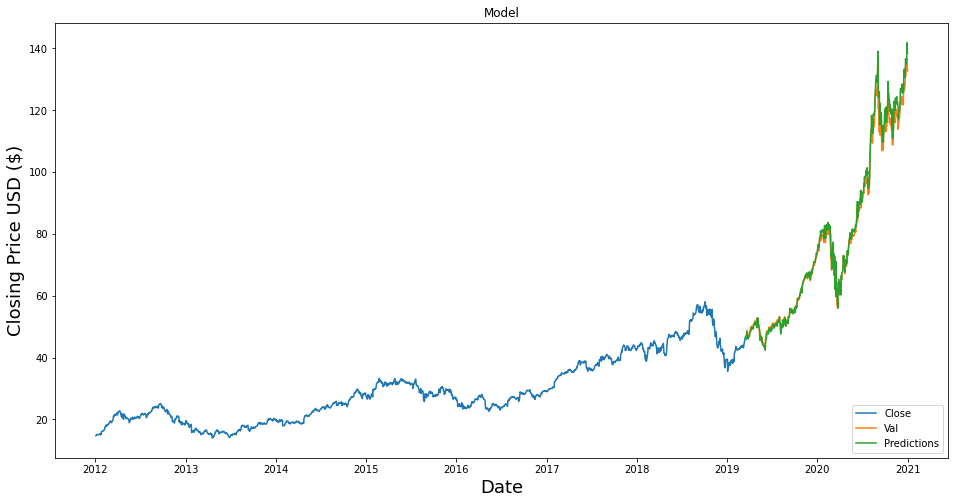

In [9]:
train = data[:training_end]
valid = data[training_end:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price USD ($)", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Close', 'Val', 'Predictions'], loc="lower right")
plt.show()

In [10]:
valid

,Close,Predictions
Date,,
2019-03-19,46.632500,46.343311
2019-03-20,47.040001,45.914562
2019-03-21,48.772499,46.417713
2019-03-22,47.762501,48.295753
2019-03-25,47.185001,47.042801
...,...,...
2020-12-24,131.970001,134.978958
2020-12-28,136.690002,136.772064
2020-12-29,134.869995,141.866776


In [11]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012.01.01', end='2021.12.07')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[176.2787]]


In [12]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020.12.07', end='2021.12.08')
print(apple_quote2['Close'])

Date
2020-12-07    123.750000
2020-12-08    124.379997
2020-12-09    121.779999
2020-12-10    123.239998
2020-12-11    122.410004
                 ...    
2021-12-02    163.759995
2021-12-03    161.839996
2021-12-06    165.320007
2021-12-07    171.179993
2021-12-08    175.080002
Name: Close, Length: 254, dtype: float64
